In [93]:
import pandas as pd
import numpy as np

### Importing & Viewing the English Premier League Dataset

### Labels 
* FTHG : Full time home goals.
* FTAG : Full time away goals.
* FTR : Full time Result.
* HTHG : Half time home goals.
* HTAG : Half time home goals.
* HTR : Half time home goals.
* HS : Home team shots.
* AS : Away team shots.
* HST : Home team shots on target.
* AST : Away team shots on target.
* HC : Home team corners.
* AC : Away team corners.
* HF : Home team Fouls.
* AF : Away team Fouls.
* HY : Home team yellow cards.
* AY : Away team yellow cards.
* HR : Home team red cards.
* AR : Away team red cards.

In [94]:
epl_data = pd.read_csv('./results.csv', encoding='unicode_escape')
epl_data

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


### Dropping NULL Values

In [95]:
epl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11113 non-null  object 
 1   DateTime  11113 non-null  object 
 2   HomeTeam  11113 non-null  object 
 3   AwayTeam  11113 non-null  object 
 4   FTHG      11113 non-null  int64  
 5   FTAG      11113 non-null  int64  
 6   FTR       11113 non-null  object 
 7   HTHG      10189 non-null  float64
 8   HTAG      10189 non-null  float64
 9   HTR       10189 non-null  object 
 10  Referee   8289 non-null   object 
 11  HS        8289 non-null   float64
 12  AS        8289 non-null   float64
 13  HST       8289 non-null   float64
 14  AST       8289 non-null   float64
 15  HC        8289 non-null   float64
 16  AC        8289 non-null   float64
 17  HF        8289 non-null   float64
 18  AF        8289 non-null   float64
 19  HY        8289 non-null   float64
 20  AY        8289 non-null   fl

In [96]:
data = epl_data.dropna()
pd.isna(data).sum()

Season      0
DateTime    0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HF          0
AF          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [97]:
data.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
2824,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,H,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
2825,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,1.0,0.0,H,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2826,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
2827,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D,1.0,2.0,A,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
2828,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,2.0,0.0,H,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [98]:
data['Date'] = pd.DatetimeIndex(data['DateTime']).date
data['Month'] = pd.DatetimeIndex(data['DateTime']).month
data = data.drop('DateTime',axis=1)
data.head()

C:\Users\AxY\AppData\Local\Temp\ipykernel_11856\3533917977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.DatetimeIndex(data['DateTime']).date
C:\Users\AxY\AppData\Local\Temp\ipykernel_11856\3533917977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = pd.DatetimeIndex(data['DateTime']).month


,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HC,AC,HF,AF,HY,AY,HR,AR,Date,Month
2824,2000-01,Charlton,Man City,4,0,H,2.0,0.0,H,Rob Harris,...,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0,2000-08-19,8
2825,2000-01,Chelsea,West Ham,4,2,H,1.0,0.0,H,Graham Barber,...,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0,2000-08-19,8
2826,2000-01,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,Barry Knight,...,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0,2000-08-19,8
2827,2000-01,Derby,Southampton,2,2,D,1.0,2.0,A,Andy D'Urso,...,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0,2000-08-19,8
2828,2000-01,Leeds,Everton,2,0,H,2.0,0.0,H,Dermot Gallagher,...,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0,2000-08-19,8


In [99]:
data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Month
count,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000
mean,1.519242,1.155507,0.681506,0.506816,13.503921,10.644589,6.117264,4.768247,6.081795,4.784292,11.379057,11.873447,1.415852,1.746532,0.062854,0.089396,6.750754
std,1.299000,1.142826,0.831712,0.723624,5.258636,4.583010,3.327521,2.792965,3.095070,2.728954,3.784956,3.957427,1.189134,1.267468,0.253416,0.297341,3.940818
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000,3.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000,8.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000,11.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,20.000000,19.000000,33.000000,29.000000,7.000000,9.000000,3.000000,2.000000,12.000000


#### Initial Scan through shows that

* The home team takes more shots & scores more goals on average.
* The away team is more foul commiting.
* The away team also gets more Yellow & Red Cards.
* Most goals scored by one team in a match are 9.
* At most 5 goals are scored at half time.

In [100]:
data_by_season = data.groupby(['Season']).sum()
data_by_season

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Month
Season,,,,,,,,,,,,,,,,,
2000-01,587,405,261.0,181.0,4861.0,3564.0,2342.0,1722.0,2390.0,1766.0,4932.0,5299.0,512.0,682.0,32.0,31.0,2615
2001-02,557,444,257.0,195.0,4656.0,3505.0,2202.0,1655.0,2441.0,1757.0,4891.0,5221.0,479.0,686.0,32.0,40.0,2550
2002-03,570,430,253.0,182.0,4876.0,3644.0,2605.0,1906.0,2516.0,1887.0,4791.0,4875.0,500.0,642.0,27.0,48.0,2627
2003-04,572,440,262.0,198.0,4960.0,3848.0,2727.0,2048.0,2385.0,1853.0,4742.0,5051.0,481.0,600.0,20.0,38.0,2481
2004-05,570,405,253.0,174.0,4819.0,3622.0,2591.0,1879.0,2309.0,1786.0,4730.0,5186.0,421.0,610.0,27.0,32.0,2566
2005-06,555,389,272.0,170.0,4689.0,3504.0,2485.0,1769.0,2270.0,1781.0,4938.0,5060.0,499.0,674.0,27.0,49.0,2524
2006-07,552,379,258.0,162.0,4906.0,3647.0,2526.0,1825.0,2420.0,1866.0,4686.0,4834.0,530.0,695.0,17.0,36.0,2664
2007-08,581,421,244.0,171.0,4882.0,3901.0,2635.0,2111.0,2374.0,1828.0,4570.0,4696.0,511.0,705.0,31.0,30.0,2544
2008-09,532,410,233.0,165.0,5187.0,4069.0,2842.0,2157.0,2374.0,1845.0,4300.0,4525.0,515.0,683.0,26.0,37.0,2607


In [101]:
data_by_season['Goals'] = data_by_season['FTAG'] + data_by_season['FTHG']
data_by_season.reset_index()

,Season,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Month,Goals
0,2000-01,587,405,261.0,181.0,4861.0,3564.0,2342.0,1722.0,2390.0,1766.0,4932.0,5299.0,512.0,682.0,32.0,31.0,2615,992
1,2001-02,557,444,257.0,195.0,4656.0,3505.0,2202.0,1655.0,2441.0,1757.0,4891.0,5221.0,479.0,686.0,32.0,40.0,2550,1001
2,2002-03,570,430,253.0,182.0,4876.0,3644.0,2605.0,1906.0,2516.0,1887.0,4791.0,4875.0,500.0,642.0,27.0,48.0,2627,1000
3,2003-04,572,440,262.0,198.0,4960.0,3848.0,2727.0,2048.0,2385.0,1853.0,4742.0,5051.0,481.0,600.0,20.0,38.0,2481,1012
4,2004-05,570,405,253.0,174.0,4819.0,3622.0,2591.0,1879.0,2309.0,1786.0,4730.0,5186.0,421.0,610.0,27.0,32.0,2566,975
5,2005-06,555,389,272.0,170.0,4689.0,3504.0,2485.0,1769.0,2270.0,1781.0,4938.0,5060.0,499.0,674.0,27.0,49.0,2524,944
6,2006-07,552,379,258.0,162.0,4906.0,3647.0,2526.0,1825.0,2420.0,1866.0,4686.0,4834.0,530.0,695.0,17.0,36.0,2664,931
7,2007-08,581,421,244.0,171.0,4882.0,3901.0,2635.0,2111.0,2374.0,1828.0,4570.0,4696.0,511.0,705.0,31.0,30.0,2544,1002
8,2008-09,532,410,233.0,165.0,5187.0,4069.0,2842.0,2157.0,2374.0,1845.0,4300.0,4525.0,515.0,683.0,26.0,37.0,2607,942
9,2009-10,645,408,283.0,179.0,5217.0,4073.0,2935.0,2253.0,2362.0,1891.0,4423.0,4771.0,526.0,711.0,23.0,45.0,2533,1053


In [129]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [130]:
data_season = data_by_season.reset_index()

#### Plotting Goals per season

Text(0, 0.5, 'Season')

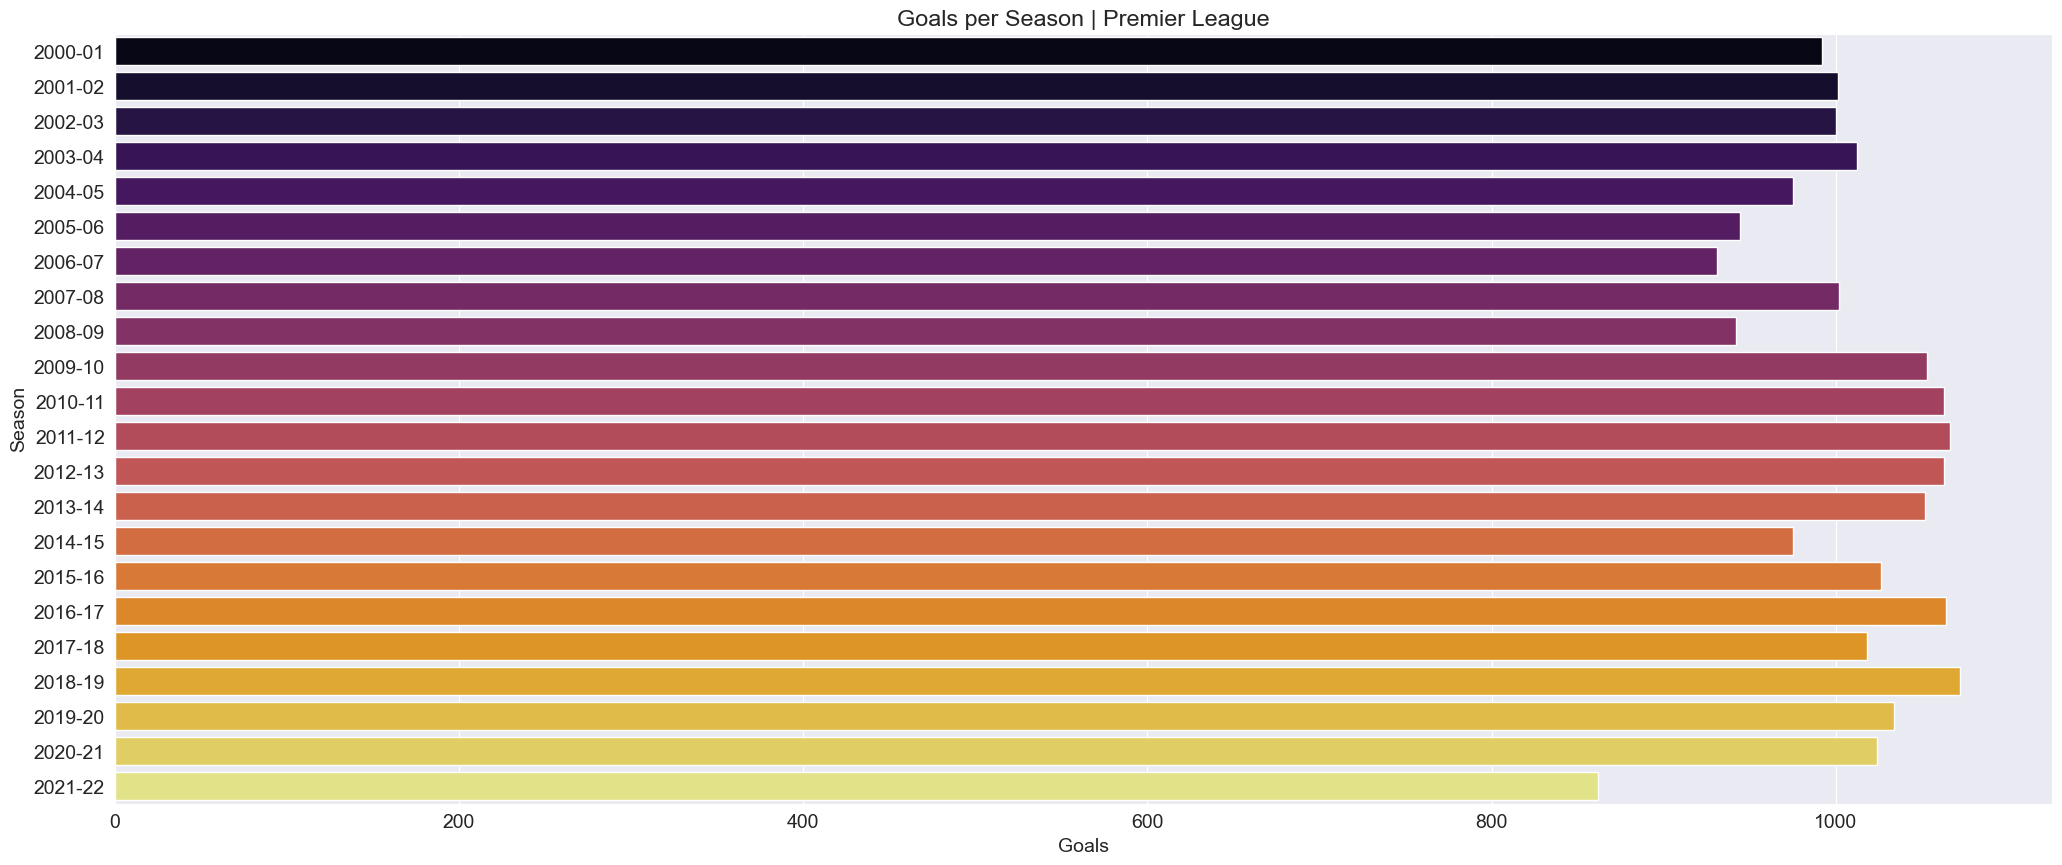

In [157]:
sns.barplot(x='Goals', y='Season', data=data_season, orient='h', palette='inferno')
plt.title("Goals per Season | Premier League")
plt.xlabel("Goals")
plt.ylabel("Season")

#### Observations

2018-19 had the highest number of goals scored whereas 2006-07 had the least.

To further analyze the goals scored, we will plot a double bar plot with 'Home' & 'Away' Goals

In [132]:
data_melted = data_season[['Season', 'FTHG', 'FTAG']]
data_melted = data_melted.melt(id_vars="Season", var_name="Home/Away", value_name="Goals")
data_melted

,Season,Home/Away,Goals
0,2000-01,FTHG,587
1,2001-02,FTHG,557
2,2002-03,FTHG,570
3,2003-04,FTHG,572
4,2004-05,FTHG,570
5,2005-06,FTHG,555
6,2006-07,FTHG,552
7,2007-08,FTHG,581
8,2008-09,FTHG,532
9,2009-10,FTHG,645


Text(0.5, 0, 'Goals')

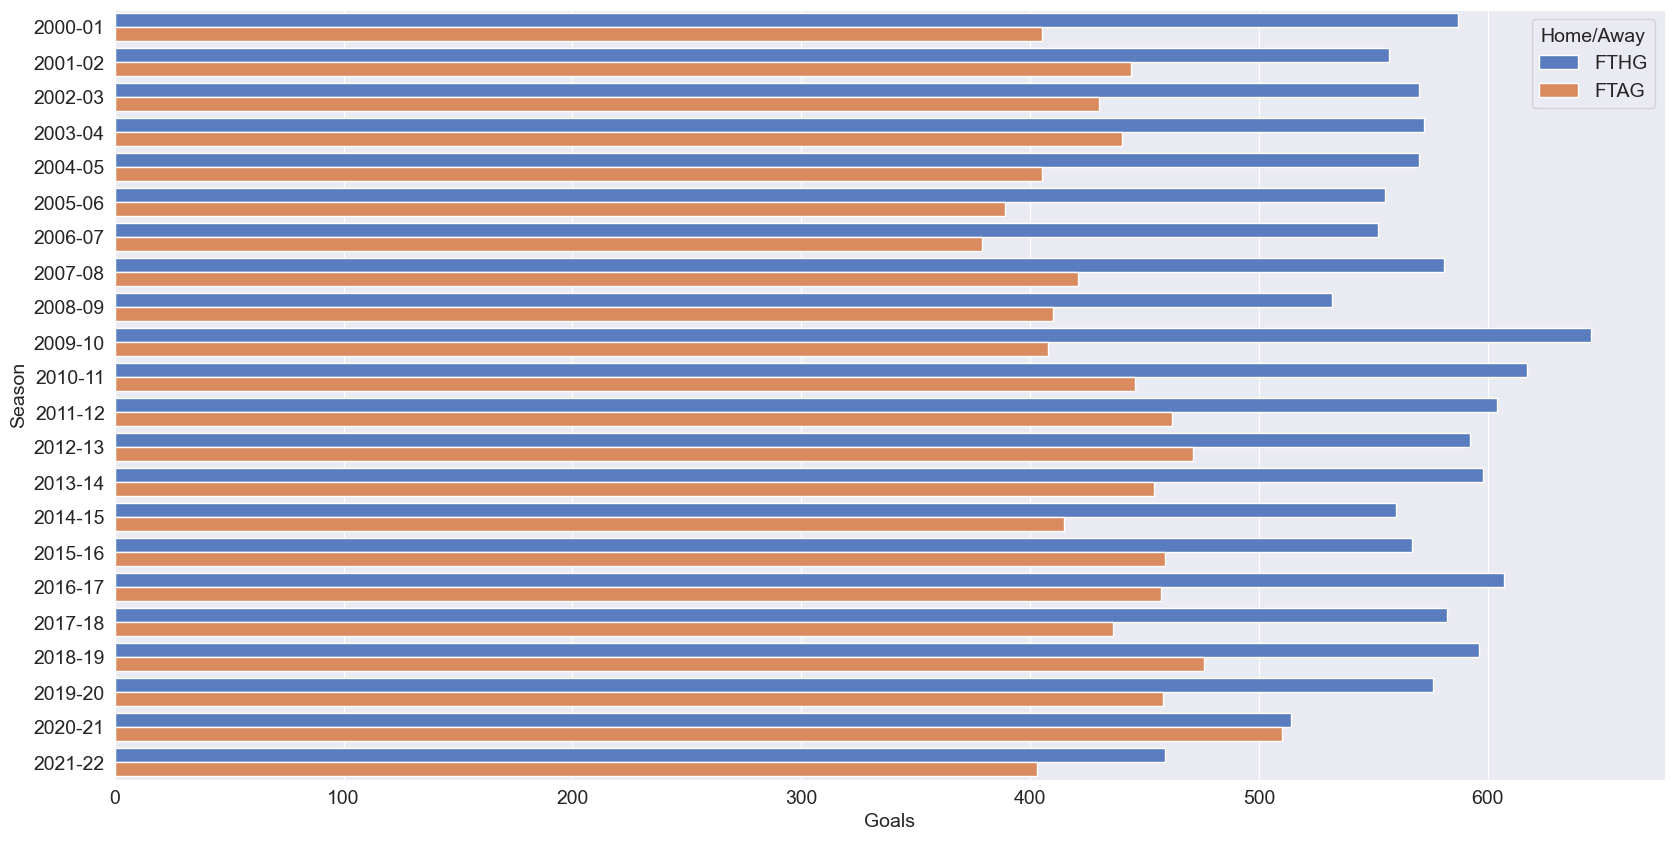

In [133]:
# plotting the double bar plot
sns.barplot(x = 'Goals', y= 'Season', hue='Home/Away', data=data_melted, palette='muted')
plt.ylabel('Season')
plt.xlabel('Goals')

**In 2020–21 Season, the games were played behind close doors. The absence of fans clearly reflects in the stats.**

Goals scored by away team are *almost* equal to those scored by home team for this season.

#### Plotting a heatmap to see the number of goals scored each month in a season

We will prepare a dataset fit for heatmap and then use the pandas `.pivot()` function

In [134]:
# preparing data for the heatmap

data_heatmap = data.groupby(['Season', 'Month']).sum().reset_index()
data_heatmap['Goals'] = data_heatmap['FTAG'] + data_heatmap['FTHG']
goals_month= data_heatmap.pivot('Season', 'Month', 'Goals')
goals_month

Month,1,2,3,4,5,6,7,8,9,10,11,12
Season,,,,,,,,,,,,
2000-01,92.0,62.0,70.0,133.0,84.0,NaN,NaN,87.0,130.0,84.0,102.0,148.0
2001-02,109.0,69.0,150.0,113.0,40.0,NaN,NaN,63.0,122.0,95.0,69.0,171.0
2002-03,108.0,89.0,75.0,146.0,64.0,NaN,NaN,85.0,110.0,76.0,114.0,133.0
2003-04,102.0,125.0,85.0,129.0,87.0,NaN,NaN,103.0,87.0,71.0,92.0,131.0
2004-05,101.0,98.0,45.0,131.0,81.0,NaN,NaN,114.0,57.0,101.0,118.0,129.0
2005-06,79.0,100.0,122.0,128.0,43.0,NaN,NaN,75.0,56.0,109.0,75.0,157.0
2006-07,116.0,73.0,65.0,138.0,52.0,NaN,NaN,71.0,69.0,79.0,90.0,178.0
2007-08,82.0,70.0,134.0,111.0,56.0,NaN,NaN,89.0,99.0,97.0,84.0,180.0
2008-09,84.0,53.0,84.0,113.0,96.0,NaN,NaN,79.0,85.0,103.0,120.0,125.0


In [135]:
data_heatmap


,Season,Month,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Comeback,Goals
0,2000-01,1,52,40,22.0,21.0,522.0,353.0,230.0,164.0,269.0,166.0,495.0,554.0,49.0,73.0,4.0,4.0,0,92
1,2000-01,2,37,25,20.0,7.0,342.0,275.0,155.0,113.0,145.0,141.0,364.0,379.0,42.0,47.0,2.0,3.0,0,62
2,2000-01,3,39,31,17.0,15.0,424.0,276.0,194.0,138.0,187.0,120.0,435.0,401.0,42.0,56.0,4.0,3.0,3,70
3,2000-01,4,67,66,32.0,29.0,626.0,438.0,313.0,226.0,303.0,224.0,672.0,721.0,81.0,91.0,7.0,5.0,3,133
4,2000-01,5,52,32,26.0,13.0,335.0,270.0,162.0,133.0,175.0,117.0,379.0,398.0,40.0,46.0,1.0,2.0,2,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-22,8,53,32,27.0,11.0,423.0,340.0,145.0,105.0,182.0,142.0,296.0,280.0,53.0,48.0,0.0,3.0,3,85
214,2021-22,9,38,35,15.0,11.0,429.0,400.0,121.0,137.0,154.0,190.0,292.0,303.0,54.0,50.0,1.0,3.0,1,73
215,2021-22,10,53,68,22.0,30.0,567.0,436.0,183.0,167.0,213.0,160.0,423.0,400.0,71.0,85.0,4.0,2.0,0,121
216,2021-22,11,54,29,24.0,17.0,466.0,324.0,162.0,114.0,188.0,131.0,326.0,361.0,60.0,66.0,2.0,3.0,1,83


Text(0.5, 1.0, 'Goals in a Month per Season')

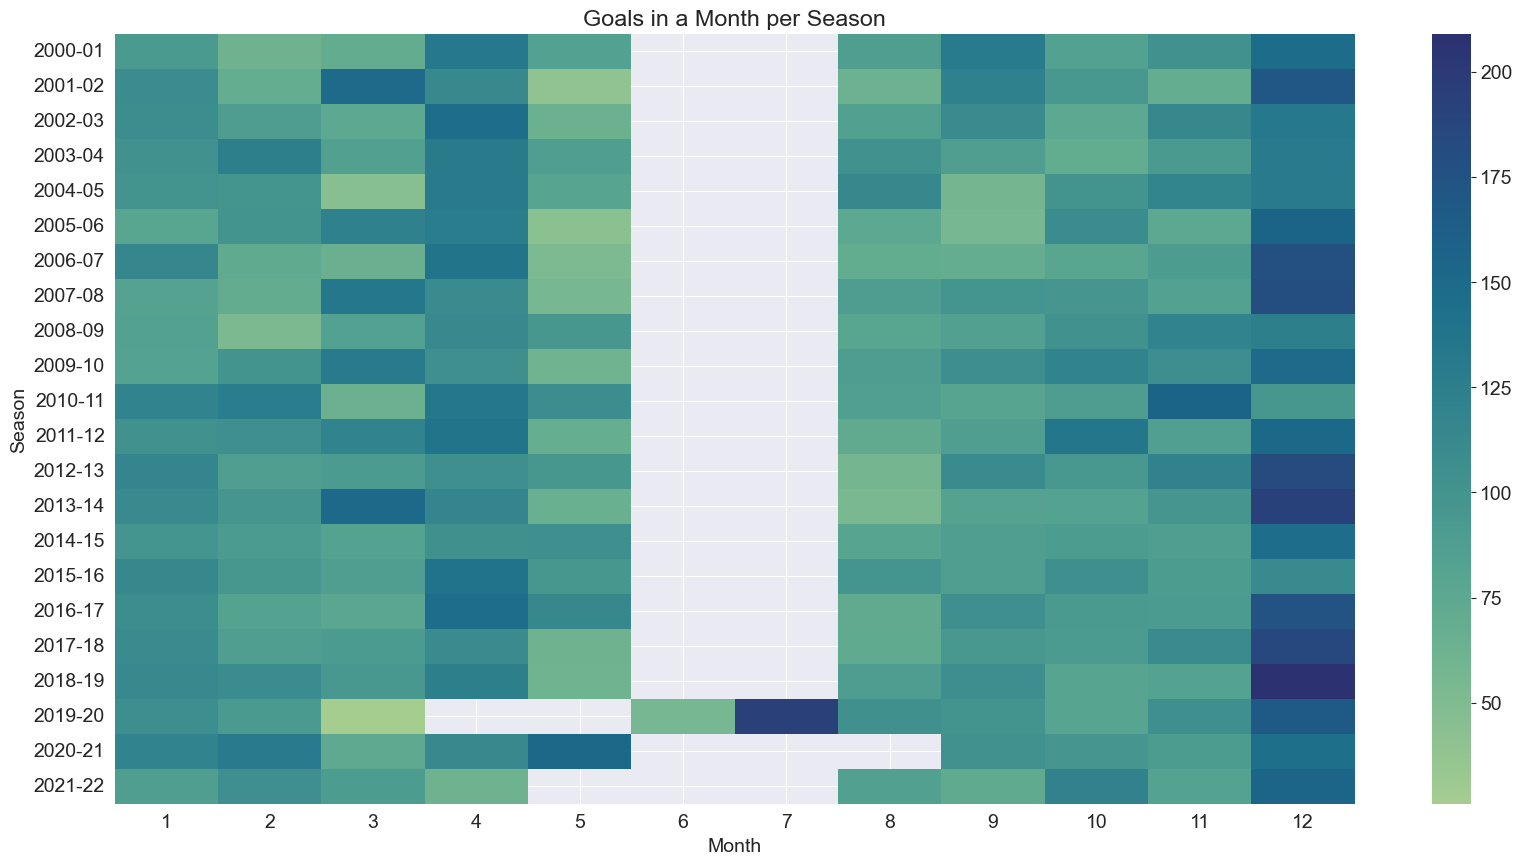

In [136]:
sns.heatmap(goals_month, cmap='crest')
plt.title('Goals in a Month per Season')

#### Some Key Observations

* December has the most number of goals, most matches are also played in Decemeber
* The season ends mid-May so that's why May has the least number of goals
* June-July are off-season, but due to the pandemic, the games were played in those months of 2020-21 season due to season restart

*These observations are correlated to the number of matches played in a month(see below)*

Text(0.5, 1.0, 'Matches per Month in a Season')

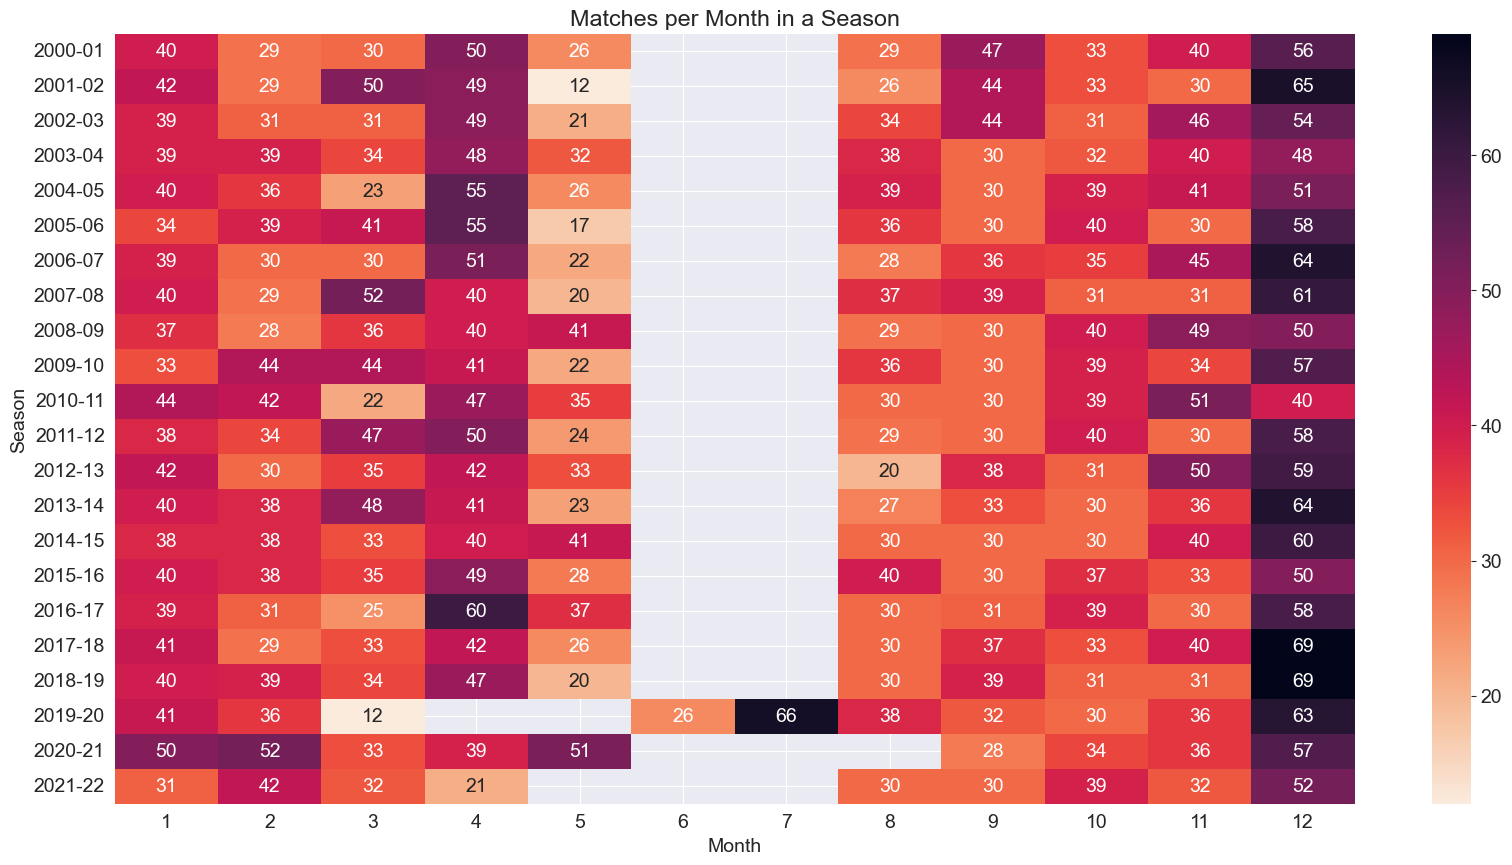

In [137]:
match_per_month = data.groupby(['Season','Month']).count().reset_index()
match_per_month['Matches'] = match_per_month['HomeTeam']
final = match_per_month.pivot('Season', 'Month', 'Matches')
sns.heatmap(final, annot=True, cmap='rocket_r')
plt.title("Matches per Month in a Season")

#### Let's get the number of goals per match in a month 

Text(0.5, 1.0, 'Goals per Match in a Month (Season-wise)')

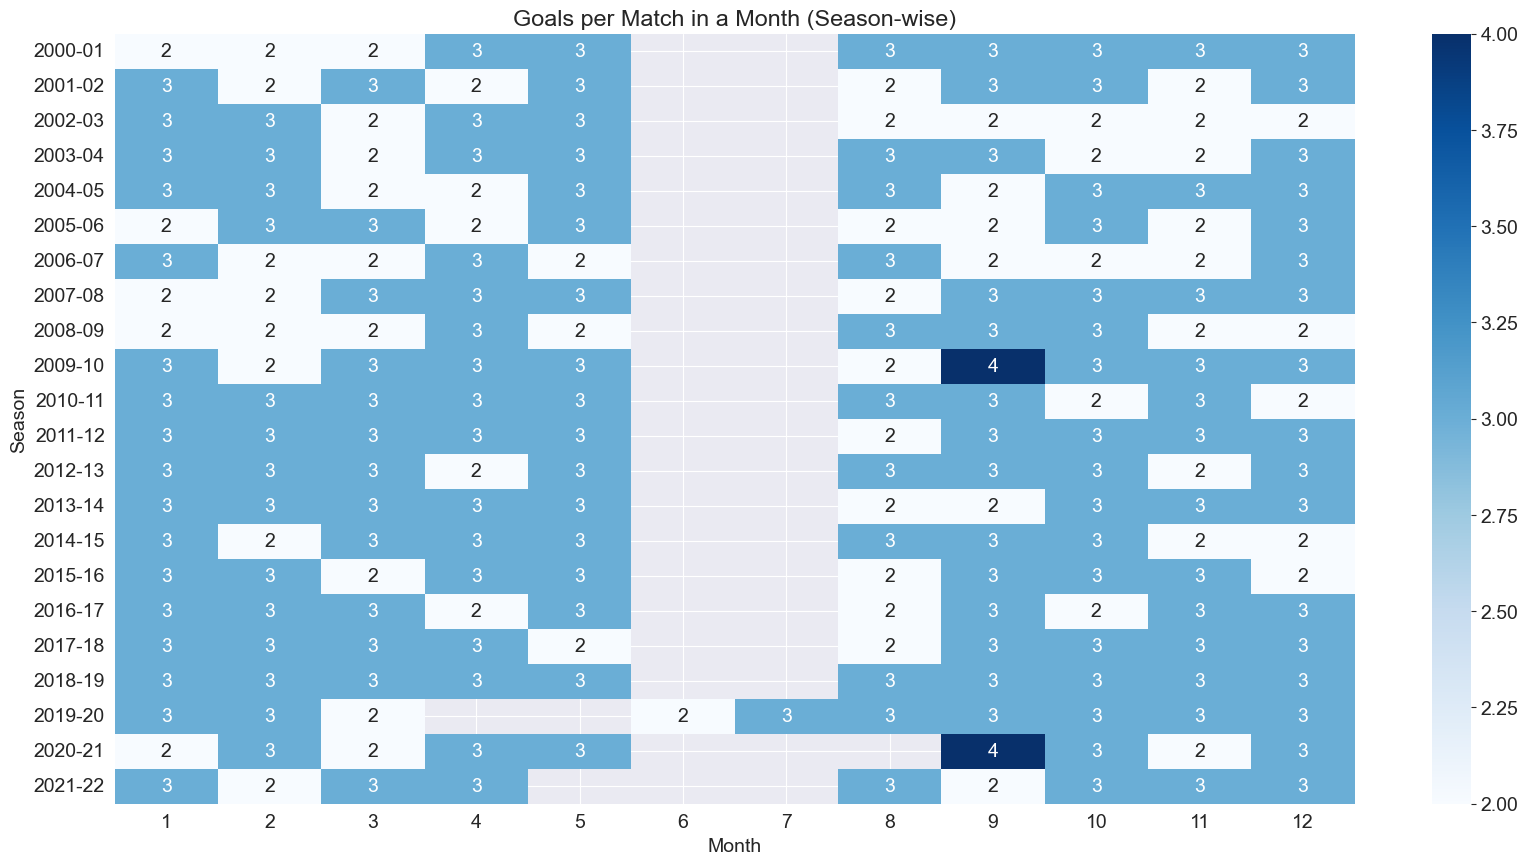

In [138]:
match_month = data.groupby(['Season','Month']).count().reset_index()
data_heatmap['Goals/Match'] = round(data_heatmap['Goals']/match_month['FTHG'])
goals_match_season = data_heatmap.pivot('Season', 'Month', 'Goals/Match')
sns.heatmap(goals_match_season, annot = True, cmap='Blues')
plt.title('Goals per Match in a Month (Season-wise)')

The goals per game stats remain fairly consistent, doesn't really tell us much.

However, *it is pretty interesting that September witnessed the highest goals per game twice*.

# Let us compare the number of shots taken in each season

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, '2000-01'),
  Text(1, 0, '2001-02'),
  Text(2, 0, '2002-03'),
  Text(3, 0, '2003-04'),
  Text(4, 0, '2004-05'),
  Text(5, 0, '2005-06'),
  Text(6, 0, '2006-07'),
  Text(7, 0, '2007-08'),
  Text(8, 0, '2008-09'),
  Text(9, 0, '2009-10'),
  Text(10, 0, '2010-11'),
  Text(11, 0, '2011-12'),
  Text(12, 0, '2012-13'),
  Text(13, 0, '2013-14'),
  Text(14, 0, '2014-15'),
  Text(15, 0, '2015-16'),
  Text(16, 0, '2016-17'),
  Text(17, 0, '2017-18'),
  Text(18, 0, '2018-19'),
  Text(19, 0, '2019-20'),
  Text(20, 0, '2020-21'),
  Text(21, 0, '2021-22')])

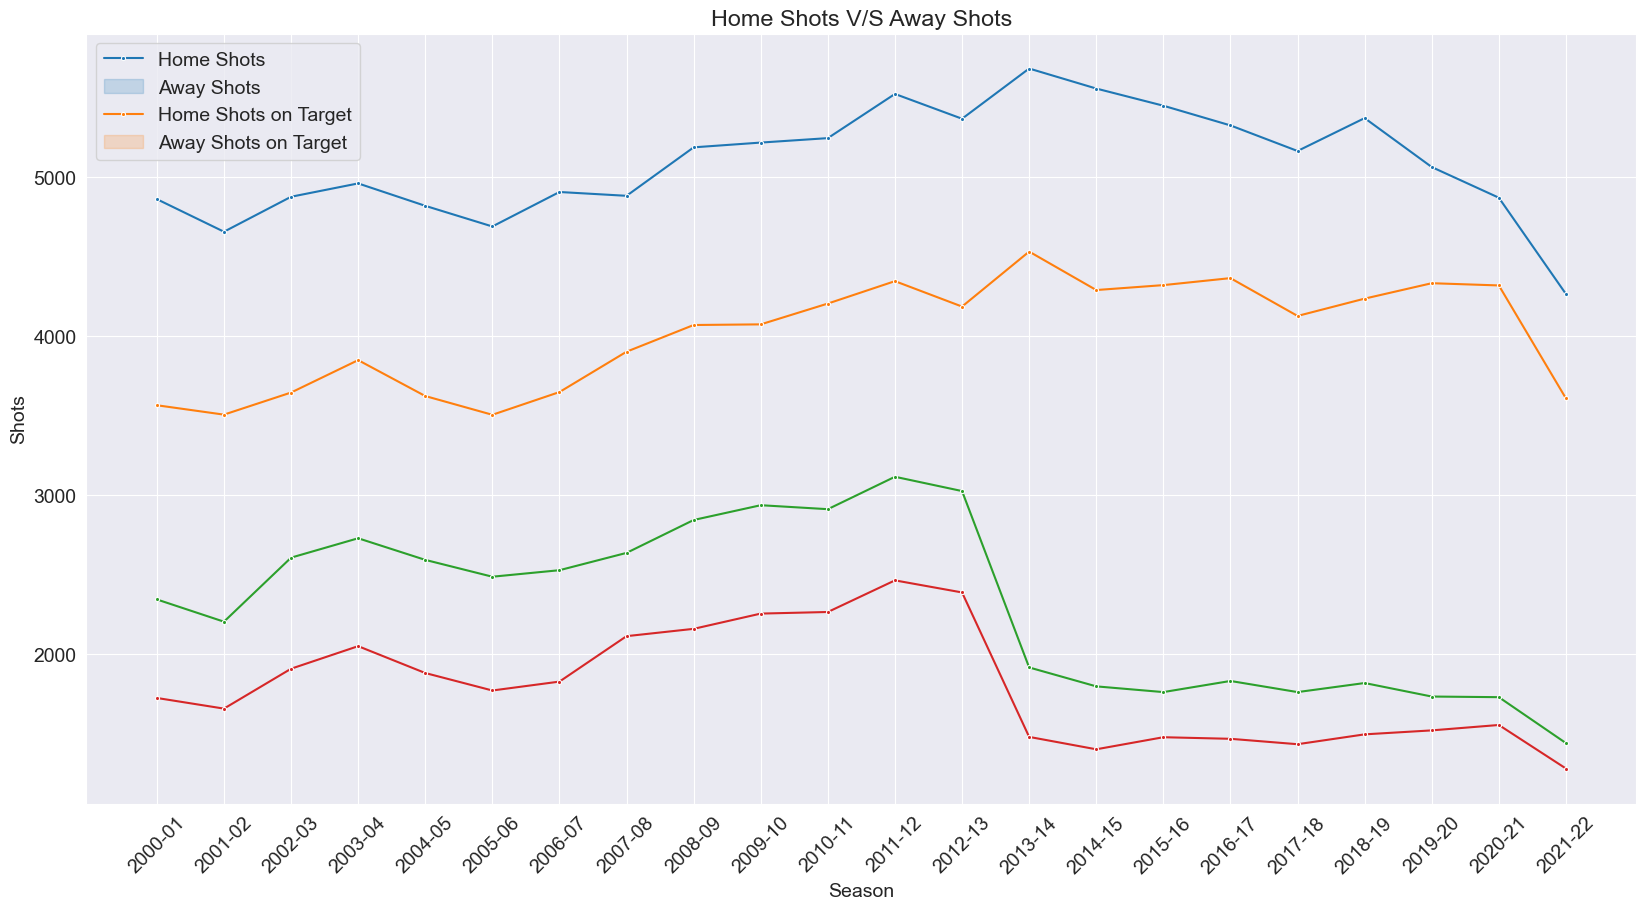

In [139]:
sns.lineplot(x=data_season.Season, y=data_season.HS, data = data_season, marker='.')    
sns.lineplot(x=data_season.Season, y=data_season.AS, data = data_season, marker='.')    
sns.lineplot(x=data_season.Season, y=data_season.HST, data = data_season, marker='.')
sns.lineplot(x=data_season.Season, y=data_season.AST, data = data_season, marker='.')
plt.legend(['Home Shots', 'Away Shots', 'Home Shots on Target', 'Away Shots on Target'])
plt.ylabel('Shots')
plt.title("Home Shots V/S Away Shots")
plt.xticks(rotation=45)

### Observations

* See how no line intersects. Home goals are always more than Away goals in a season.*There's clearly a home advantage*.
* The number of goals are the lowest in the 2021-22 season (closed door games). Fans clearly play a big role in the games.
* Although the lines are pretty flat, there is a significant drop in shots at target from 2012-13 to 2013-14 season.


# Now let's compare the teams in the English Premier League

In [140]:
# first we'll have to create 2 dataframes for home and away teams since we don't have 'teams' column, we have to use the home and away team columns
data_home = data.groupby(data.HomeTeam)
data_away = data.groupby(data.AwayTeam)

In [141]:
# now to total the number of goals scored by a particular team, we'll its home and away goals
data_team_goals = data_home['FTHG'].sum() + data_away['FTAG'].sum()
data_team_goals = data_team_goals.reset_index()
data_team_goals.rename(columns={0:"Goals"}, inplace=True)
data_team_goals = data_team_goals.sort_values(['Goals'], ascending=False)
data_team_goals = data_team_goals.reset_index()

Text(0, 0.5, 'Teams')

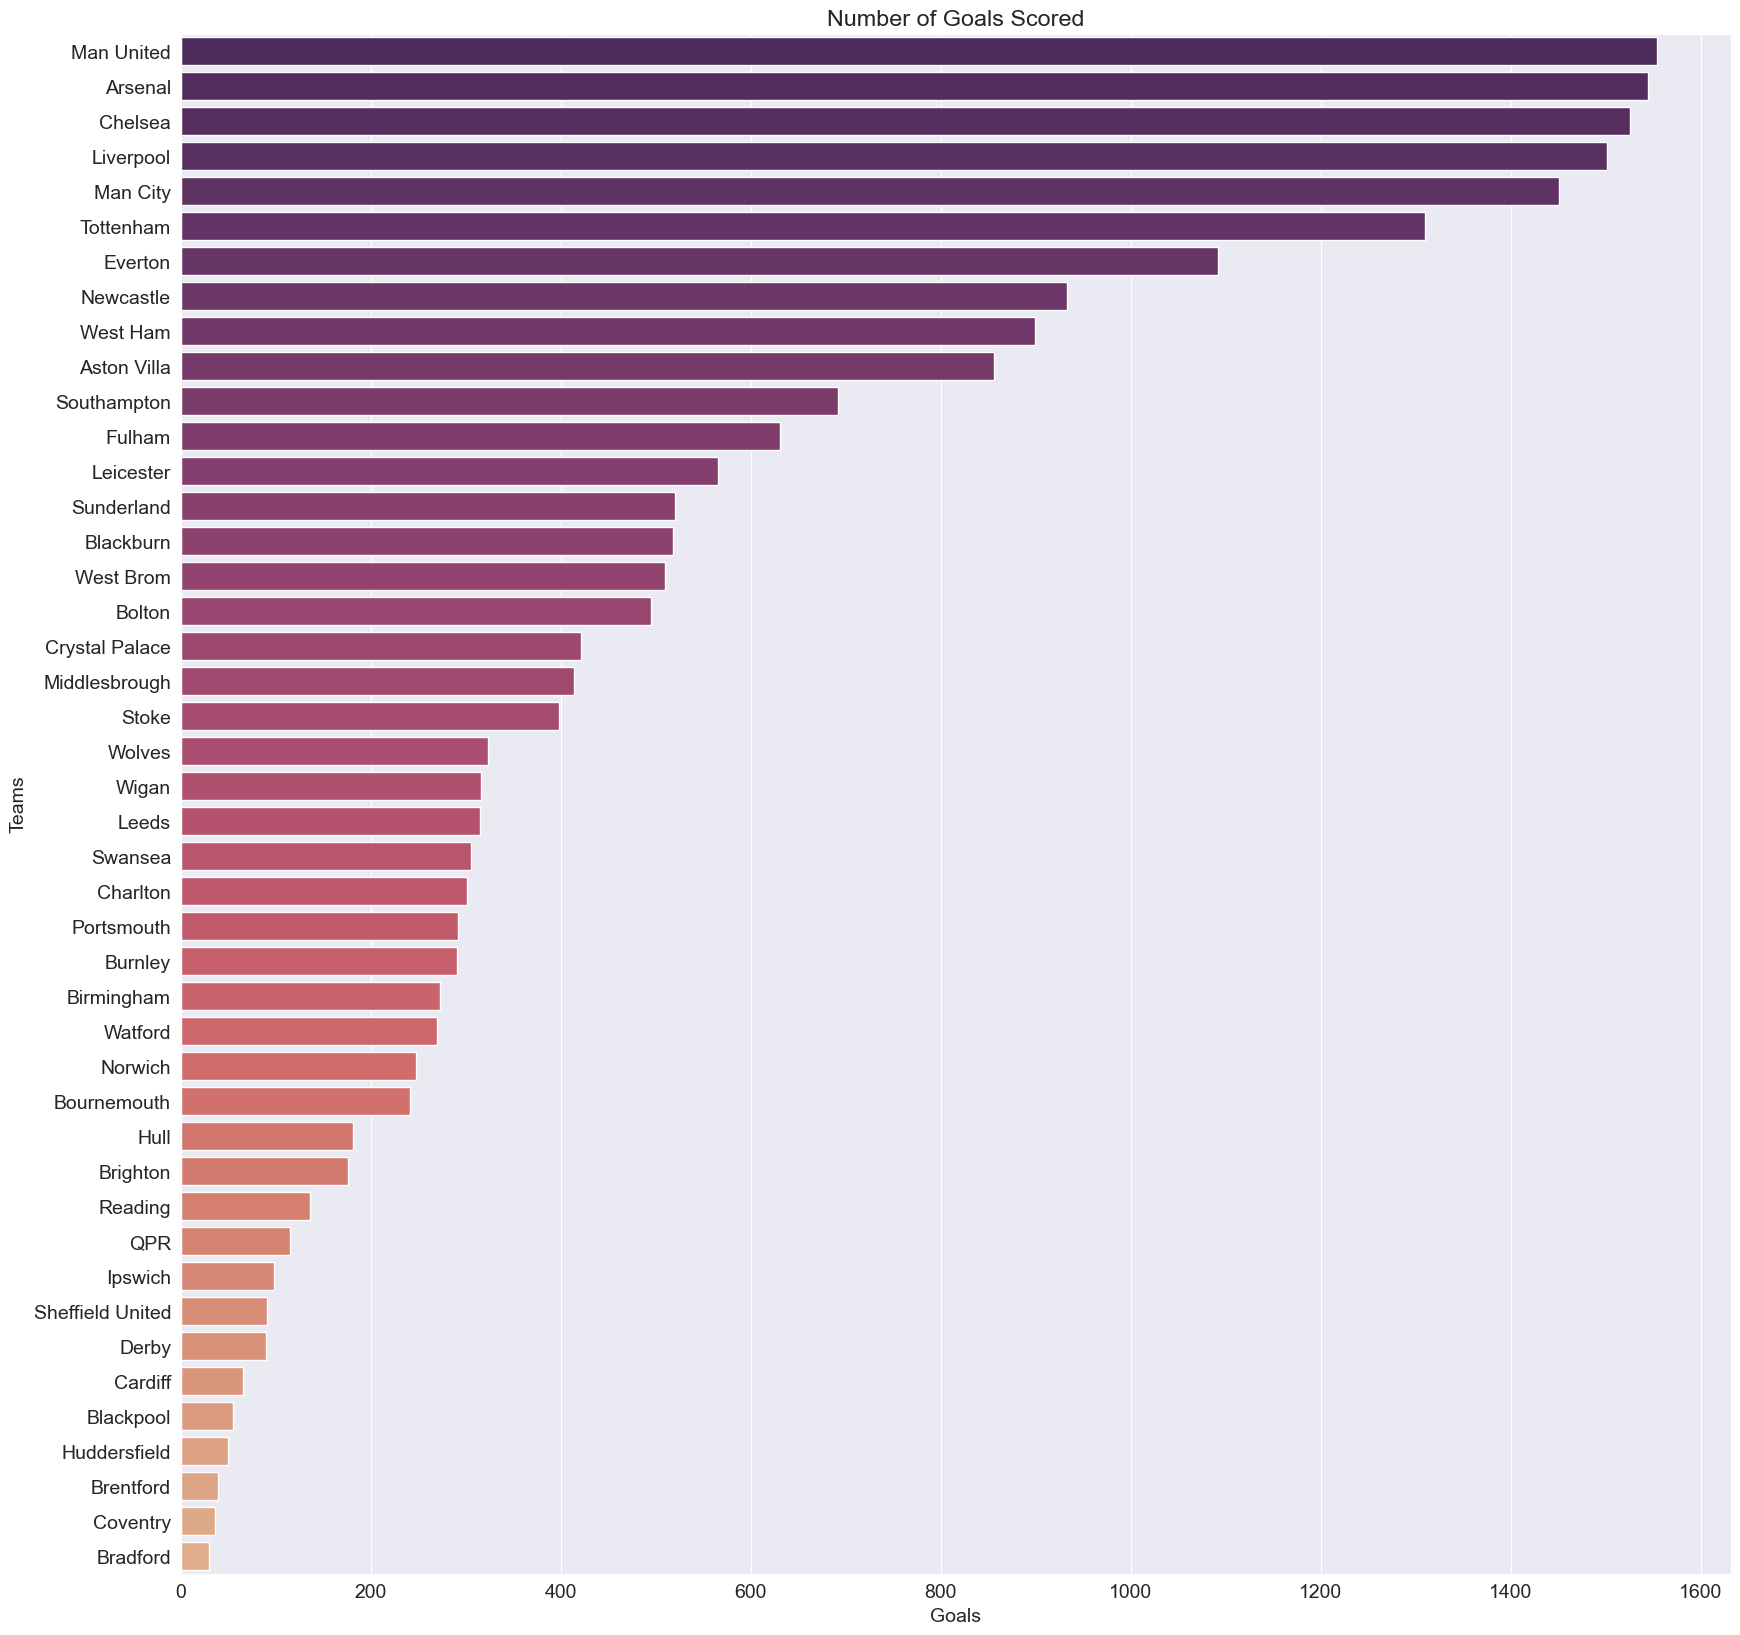

In [142]:
#plotting the number of goals
matplotlib.rcParams['figure.figsize'] = (20,20)
sns.barplot(x="Goals", y="HomeTeam", data= data_team_goals, palette="flare_r")
# plt.xlabel('Goals')
plt.title("Number of Goals Scored")
plt.ylabel('Teams')


## Key Observations
As we can see,

* Manchester United has scored the highest goals in Premier League since 2000–01 season till date. Sir Alex Feguson the GOAT
* The traditional “big-six” teams occupy the top six positions.
* Bradford has scored the least goals in premier league.

#### Let's find the shot conversion rate
Basically we're going to find which team has been the most lethal


In [143]:
home_scr = data_home['FTHG', 'HS'].sum().reset_index()
away_scr = data_away['FTAG', 'AS'].sum().reset_index()
home_scr.rename(columns={"HomeTeam":"Team"}, inplace=True)
away_scr.rename(columns={"AwayTeam":"Team"}, inplace=True)
team_scr = pd.concat([home_scr, away_scr['FTAG'], away_scr['AS']], axis=1)
team_scr['SCR'] = ((team_scr['FTHG'] + team_scr['FTAG']) / (team_scr['HS'] + team_scr['AS']))*100
team_scr

C:\Users\AxY\AppData\Local\Temp\ipykernel_11856\690620993.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  home_scr = data_home['FTHG', 'HS'].sum().reset_index()
C:\Users\AxY\AppData\Local\Temp\ipykernel_11856\690620993.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  away_scr = data_away['FTAG', 'AS'].sum().reset_index()


,Team,FTHG,HS,FTAG,AS,SCR
0,Arsenal,882,6491.0,663,5045.0,13.392857
1,Aston Villa,452,4234.0,404,3641.0,10.869841
2,Birmingham,162,1365.0,111,1064.0,11.239193
3,Blackburn,289,2645.0,229,2000.0,11.151776
4,Blackpool,30,253.0,25,193.0,12.331839
5,Bolton,278,2787.0,217,2003.0,10.334029
6,Bournemouth,136,1191.0,105,1021.0,10.895118
7,Bradford,20,221.0,10,150.0,8.086253
8,Brentford,18,186.0,21,163.0,11.174785
9,Brighton,95,1185.0,81,911.0,8.396947


Text(0, 0.5, 'Teams')

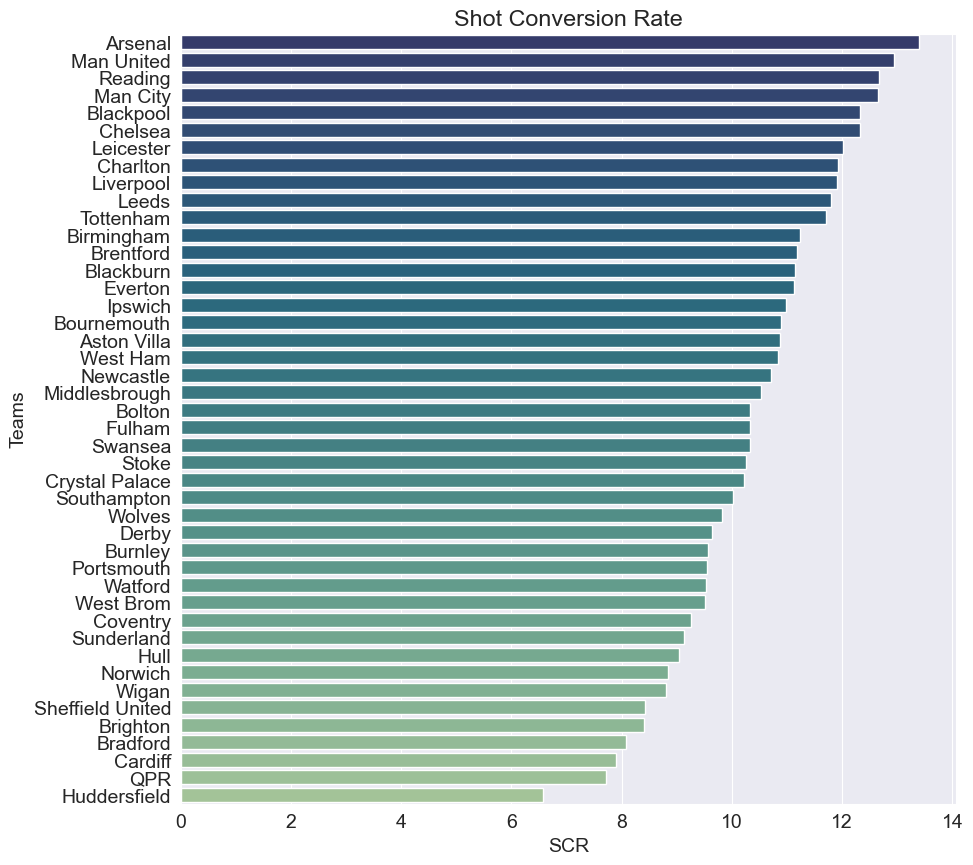

In [144]:
matplotlib.rcParams['figure.figsize'] = (10,10)
team_scr = team_scr.sort_values(['SCR'], ascending=False)
sns.barplot(data= team_scr, x='SCR', y='Team', palette="crest_r")
plt.title('Shot Conversion Rate')
plt.ylabel('Teams')

## Observations
* Arsenal is more the most lethal of them all, justifies having canons in their logo
* Hudderfield is the most wasteful with its shots
* Brighton is often talked as one of the most offensive teams which don't convert shots into goals, the plot above proves that.

#### Let's get the home win percentage of different teams

In [145]:
# homewin will have num. of Home won games/home team rounded to 3 then taken as percentage
home_win = 100* round(data.loc[data['FTR'] == 'H'].groupby('HomeTeam')['FTR'].count()/data.groupby('HomeTeam')['FTR'].count(),3)
# data
# home_win = home_win.sort_values(ascending=False)
home_win

HomeTeam
Arsenal             67.0
Aston Villa         36.7
Birmingham          37.6
Blackburn           41.1
Blackpool           26.3
Bolton              38.8
Bournemouth         35.8
Bradford            21.1
Brentford           37.5
Brighton            27.2
Burnley             33.8
Cardiff             28.9
Charlton            40.6
Chelsea             65.9
Coventry            21.1
Crystal Palace      32.6
Derby               24.6
Everton             49.5
Fulham              42.1
Huddersfield        21.1
Hull                30.5
Ipswich             44.7
Leeds               39.6
Leicester           42.9
Liverpool           63.8
Man City            62.8
Man United          69.2
Middlesbrough       37.4
Newcastle           44.4
Norwich             31.5
Portsmouth          40.6
QPR                 26.3
Reading             40.4
Sheffield United    38.6
Southampton         39.0
Stoke               42.6
Sunderland          30.5
Swansea             38.3
Tottenham           58.5
Watford         

Text(0.5, 1.0, 'Home Ground Win %')

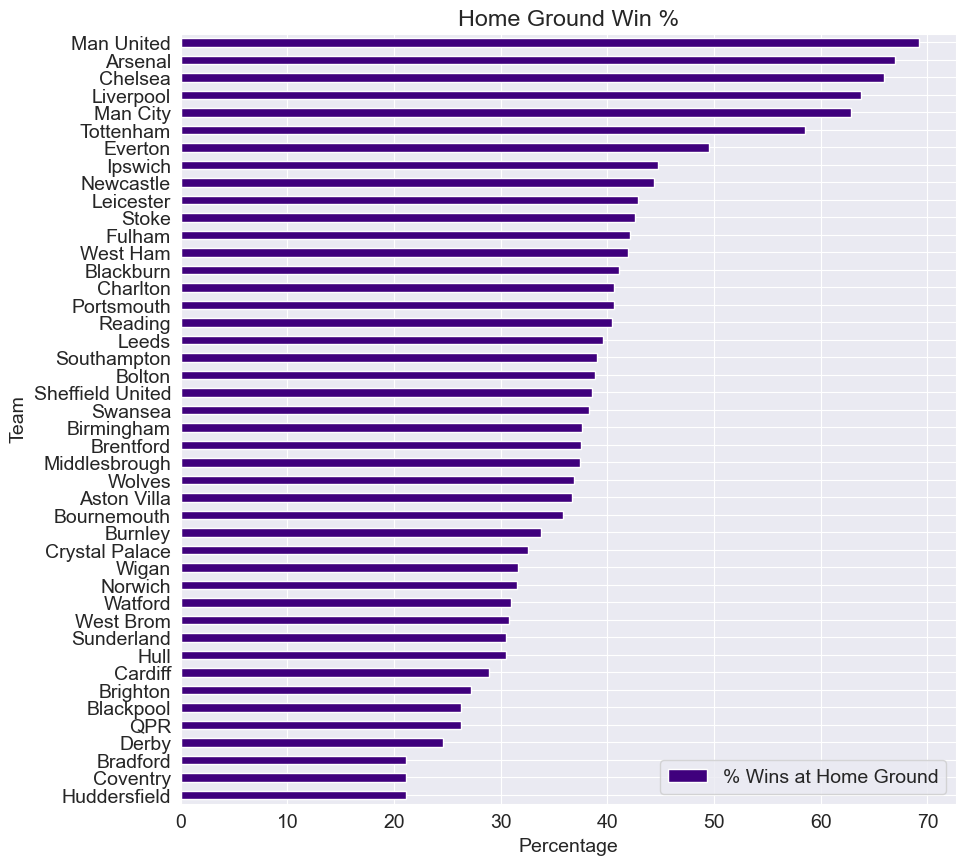

In [146]:
matplotlib.rcParams['figure.figsize'] = (10,10)
home_win.sort_values(ascending=True).plot(kind = 'barh', cmap='Purples_r')
plt.xlabel('Percentage')
plt.ylabel('Team')
plt.legend(['% Wins at Home Ground'])
plt.title("Home Ground Win %")

## Observations

* Manchester United has won the most % of the games played at Old Trafford, followed by Arsenal at Emirates and Highbury, and Chelsea at Stamford Bridge.
* Coventry has the least home ground advantage & holds the unwanted record of winning the least games of those played at St. Andrew’s stadium and Ricoh Arena

# Now let's dive a little deeper in the data

In [147]:
# Which referee gave the most red cards ?
data_ref = data.groupby(['Referee']).sum().reset_index()
data_ref['Red_Cards'] = data_ref['HR']+data_ref['AR']
data_ref = data_ref.loc[data_ref['Red_Cards'] != 0].sort_values(['Red_Cards'], ascending = False)
data_ref

,Referee,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Month,Comeback,Red_Cards
75,M Dean,801,618,366.0,271.0,7329.0,5739.0,3271.0,2530.0,3224.0,2546.0,5889.0,5905.0,942.0,989.0,38.0,70.0,3506,26,108.0
73,M Atkinson,664,484,297.0,209.0,6244.0,4811.0,2650.0,2016.0,2680.0,2166.0,4807.0,5214.0,658.0,814.0,29.0,38.0,3147,22,67.0
100,P Dowd,495,353,214.0,141.0,4098.0,3184.0,2113.0,1625.0,1925.0,1519.0,3646.0,3983.0,436.0,629.0,23.0,42.0,2039,15,65.0
2,A Marriner,579,504,266.0,230.0,5208.0,4222.0,2230.0,1833.0,2207.0,1825.0,3888.0,3979.0,529.0,646.0,22.0,37.0,2424,11,59.0
118,R Styles,246,173,117.0,82.0,2263.0,1726.0,1203.0,897.0,1128.0,803.0,1892.0,2035.0,249.0,321.0,20.0,30.0,1165,5,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,D Pugh,9,3,4.0,0.0,70.0,43.0,40.0,18.0,30.0,13.0,59.0,48.0,5.0,8.0,0.0,1.0,41,0,1.0
27,D England,32,35,18.0,19.0,377.0,257.0,123.0,93.0,159.0,98.0,263.0,269.0,40.0,49.0,0.0,1.0,165,1,1.0
11,Andy Hall,3,0,0.0,0.0,13.0,8.0,8.0,4.0,3.0,5.0,17.0,15.0,2.0,1.0,0.0,1.0,8,0,1.0
111,"Poll, G.",26,13,12.0,6.0,157.0,122.0,77.0,64.0,58.0,60.0,151.0,163.0,16.0,14.0,0.0,1.0,55,0,1.0


Text(0.5, 0, 'Number of Red Cards')

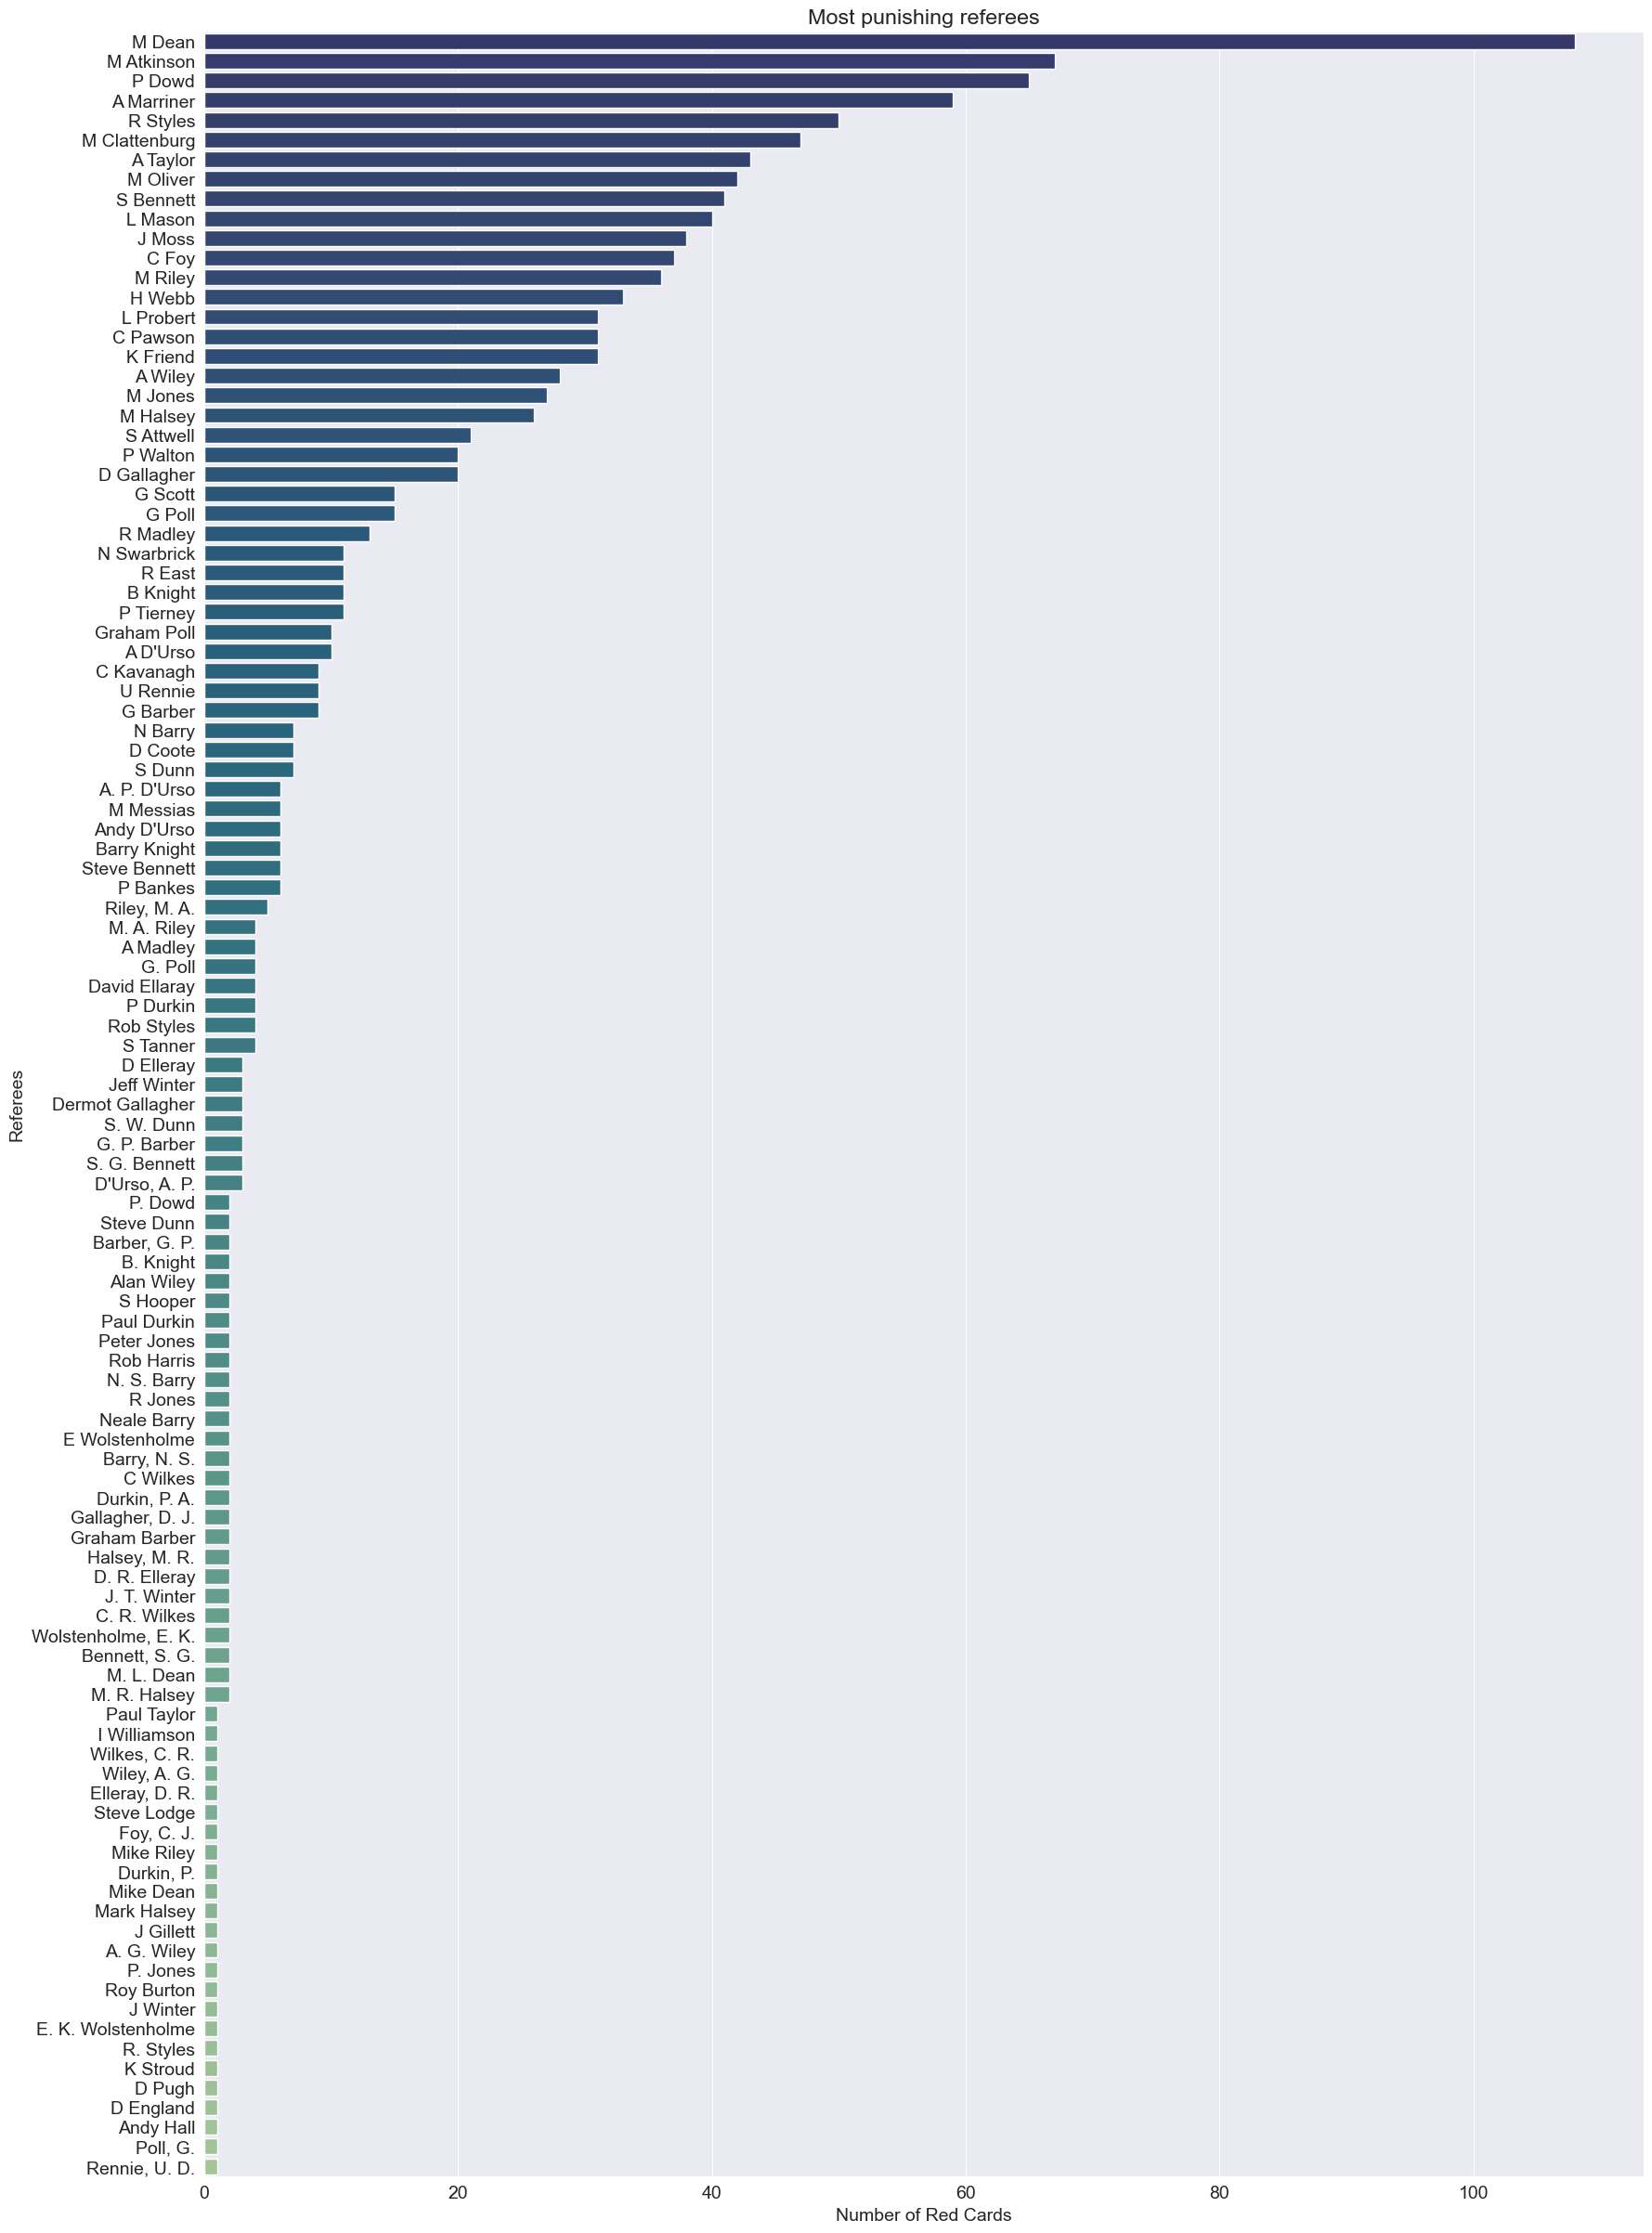

In [148]:
#plotting the datafram
matplotlib.rcParams['figure.figsize'] = (20,30)
sns.barplot(data = data_ref, x = 'Red_Cards', y = 'Referee', palette='crest_r')
plt.title("Most punishing referees")
plt.ylabel("Referees")
plt.xlabel("Number of Red Cards")

### Observations

* Mike Dean (who is the only one with more than 100 red cards given by the way) along with M Atkinson, P Dowd sure do give a lot of red cards, must be hated by the fans if I had to take a guess :P
* UD Rennie, G Poll, Andy Hall are quite forgiving

### Which seasons saw the most comebacks?

We'll try to see the number of comebacks in a season by the teams in matches

In [149]:
data['Comeback'] = np.where((data['FTR'] != data['HTR']) & (data['FTR'] != 'D') & (data['HTR'] != 'D'),1,0)
data_comeback = data.groupby('Season').sum().reset_index()
data_comeback

,Season,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Month,Comeback
0,2000-01,587,405,261.0,181.0,4861.0,3564.0,2342.0,1722.0,2390.0,1766.0,4932.0,5299.0,512.0,682.0,32.0,31.0,2615,18
1,2001-02,557,444,257.0,195.0,4656.0,3505.0,2202.0,1655.0,2441.0,1757.0,4891.0,5221.0,479.0,686.0,32.0,40.0,2550,15
2,2002-03,570,430,253.0,182.0,4876.0,3644.0,2605.0,1906.0,2516.0,1887.0,4791.0,4875.0,500.0,642.0,27.0,48.0,2627,16
3,2003-04,572,440,262.0,198.0,4960.0,3848.0,2727.0,2048.0,2385.0,1853.0,4742.0,5051.0,481.0,600.0,20.0,38.0,2481,19
4,2004-05,570,405,253.0,174.0,4819.0,3622.0,2591.0,1879.0,2309.0,1786.0,4730.0,5186.0,421.0,610.0,27.0,32.0,2566,12
5,2005-06,555,389,272.0,170.0,4689.0,3504.0,2485.0,1769.0,2270.0,1781.0,4938.0,5060.0,499.0,674.0,27.0,49.0,2524,15
6,2006-07,552,379,258.0,162.0,4906.0,3647.0,2526.0,1825.0,2420.0,1866.0,4686.0,4834.0,530.0,695.0,17.0,36.0,2664,14
7,2007-08,581,421,244.0,171.0,4882.0,3901.0,2635.0,2111.0,2374.0,1828.0,4570.0,4696.0,511.0,705.0,31.0,30.0,2544,17
8,2008-09,532,410,233.0,165.0,5187.0,4069.0,2842.0,2157.0,2374.0,1845.0,4300.0,4525.0,515.0,683.0,26.0,37.0,2607,16
9,2009-10,645,408,283.0,179.0,5217.0,4073.0,2935.0,2253.0,2362.0,1891.0,4423.0,4771.0,526.0,711.0,23.0,45.0,2533,17


Text(0, 0.5, 'Comebacks')

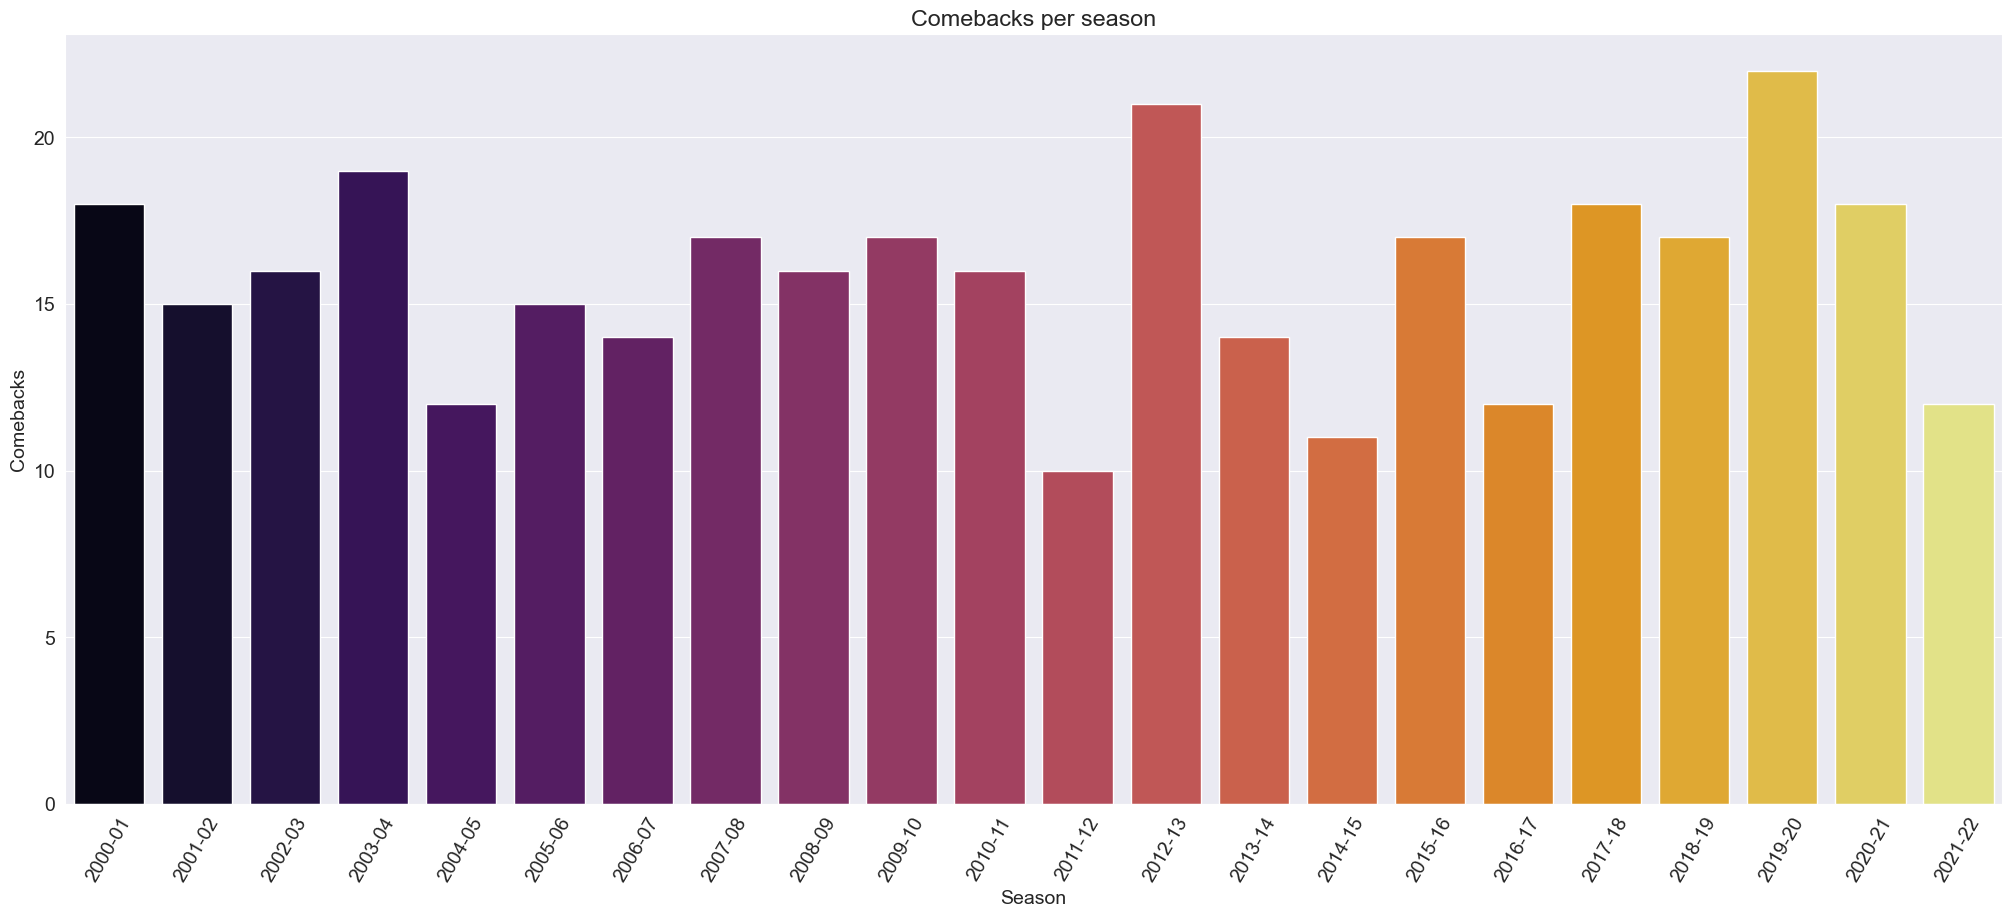

In [150]:
# lets plot the data too
plt.rcParams['figure.figsize'] = (25, 10)
sns.barplot(x='Season', y='Comeback', data = data_comeback, palette='inferno')
plt.title('Comebacks per season')
plt.xticks(rotation=60)
plt.ylabel('Comebacks')

2019–20 Season, won by Liverpool, witnessed the most comebacks followed by the 2012–13 season.

# Finally , lets plot a points table

We’ll first need to find the following stats for home teams.

* Number of home games played.
* Number of home games won.
* Number of home games drawn.
* Number of home games lost.
* Goals scored and goals against.

In [151]:
hp = data.groupby(['Season', 'HomeTeam'])['FTR'].count().rename("HP")                       #games played by home team
hw = data[data['FTR'] == 'H'].groupby(['Season', 'HomeTeam'])['FTR'].count().rename("HW")   #games won
hl = data[data['FTR'] == 'A'].groupby(['Season', 'HomeTeam'])['FTR'].count().rename("HL")   #games lost
hd = data[data['FTR'] == 'D'].groupby(['Season', 'HomeTeam'])['FTR'].count().rename("HD")   #games drawn

home_games = pd.concat([hp, hw, hl, hd], axis = 1).reset_index()
home_games.fillna(0,inplace=True)
home_games[['HP','HL','HD','HW']]=home_games[['HP','HL','HD','HW']].astype(int)

home_score= data.groupby(['Season','HomeTeam'])['FTAG','FTHG'].sum().astype(int).reset_index()
home_score.rename(columns={'FTHG':'HG For','FTAG':'HG Against'},inplace=True)

home_df = pd.merge(left=home_games, right = home_score, on=['Season', 'HomeTeam'],how='left')
home_df

C:\Users\AxY\AppData\Local\Temp\ipykernel_11856\3397788779.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  home_score= data.groupby(['Season','HomeTeam'])['FTAG','FTHG'].sum().astype(int).reset_index()


,Season,HomeTeam,HP,HW,HL,HD,HG Against,HG For
0,2000-01,Arsenal,19,15,1,3,13,45
1,2000-01,Aston Villa,19,8,3,8,20,27
2,2000-01,Bradford,19,4,8,7,29,20
3,2000-01,Charlton,19,11,3,5,19,31
4,2000-01,Chelsea,19,13,3,3,20,44
...,...,...,...,...,...,...,...,...
435,2021-22,Southampton,16,5,4,7,20,20
436,2021-22,Tottenham,15,10,4,1,17,31
437,2021-22,Watford,15,2,12,1,37,14
438,2021-22,West Ham,16,9,4,3,21,29


In [152]:
# doing the same for Away teams
ap = data.groupby(['Season', 'AwayTeam'])['FTR'].count().rename("AP")                       #games played by home team
aw = data[data['FTR'] == 'A'].groupby(['Season', 'AwayTeam'])['FTR'].count().rename("AW")   #games won
al = data[data['FTR'] == 'H'].groupby(['Season', 'AwayTeam'])['FTR'].count().rename("AL")   #games lost
ad = data[data['FTR'] == 'D'].groupby(['Season', 'AwayTeam'])['FTR'].count().rename("AD")   #games drawn

away_games = pd.concat([ap, aw, al, ad], axis = 1).reset_index()
away_games.fillna(0,inplace=True)
away_games[['AP','AL','AD','AW']]=away_games[['AP','AL','AD','AW']].astype(int)

away_score= data.groupby(['Season','AwayTeam'])['FTAG','FTHG'].sum().astype(int).reset_index()
away_score.rename(columns={'FTHG':'AG For','FTAG':'AG Against'},inplace=True)

away_df = pd.merge(left=away_games, right = away_score, on=['Season', 'AwayTeam'],how='left')
away_df

C:\Users\AxY\AppData\Local\Temp\ipykernel_11856\4221760527.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  away_score= data.groupby(['Season','AwayTeam'])['FTAG','FTHG'].sum().astype(int).reset_index()


,Season,AwayTeam,AP,AW,AL,AD,AG Against,AG For
0,2000-01,Arsenal,19,5,7,7,18,25
1,2000-01,Aston Villa,19,5,7,7,19,23
2,2000-01,Bradford,19,1,14,4,10,41
3,2000-01,Charlton,19,3,11,5,19,38
4,2000-01,Chelsea,19,4,8,7,24,25
...,...,...,...,...,...,...,...,...
435,2021-22,Southampton,15,3,7,5,17,32
436,2021-22,Tottenham,16,8,6,2,25,20
437,2021-22,Watford,16,4,9,3,15,23
438,2021-22,West Ham,16,6,7,3,22,21


#### Now lets merge the dataframes and generate the points table

The points will be given as:
* +3 for a Win
* +1 for a Draw
* 0 for a Loss

In [153]:
points = pd.merge(left= home_df, right=away_df, left_on=['Season', 'HomeTeam'], right_on=['Season', 'AwayTeam']).drop(['AwayTeam'], axis=1)
points.rename(columns={'HomeTeam':'Team'}, inplace=True)
points['Total Played'] = points['HP'] + points['AP']
points['Total Wins'] = points['HW'] + points['AW']
points['Total Loss'] = points['HL'] + points['AL']
points['Total Draws'] = points['HD'] + points['AD']
points['Goals For'] = points['HG For'] + points['AG For']
points['Goals Against'] = points['HG Against'] + points['AG Against']
points['Goal Difference'] = points['Goals For'] + points['Goals Against']
points['Points'] = 3*points['Total Wins'] + points['Total Draws']


### Now we will rank the teams by points

*If 2 teams have the same points, then the deciding factor will be 'Goal Difference'*


In [154]:
points['Rank'] = points.groupby('Season')['Points'].rank(method='min', ascending=False)
points['Fin'] = points.groupby(['Season', 'Rank'])['Goal Difference'].rank(method='first',ascending=False)  # incase the points are same, compare by goal difference
points['Rank'] = np.where((points['Fin'] > 1), (points['Rank'] + points['Fin'] - 1), points['Rank'])
points.drop('Fin', axis=1, inplace=True)
points

,Season,Team,HP,HW,HL,HD,HG Against,HG For,AP,AW,...,AG For,Total Played,Total Wins,Total Loss,Total Draws,Goals For,Goals Against,Goal Difference,Points,Rank
0,2000-01,Arsenal,19,15,1,3,13,45,19,5,...,25,38,20,8,10,70,31,101,70,2.0
1,2000-01,Aston Villa,19,8,3,8,20,27,19,5,...,23,38,13,10,15,50,39,89,54,8.0
2,2000-01,Bradford,19,4,8,7,29,20,19,1,...,41,38,5,22,11,61,39,100,26,20.0
3,2000-01,Charlton,19,11,3,5,19,31,19,3,...,38,38,14,14,10,69,38,107,52,9.0
4,2000-01,Chelsea,19,13,3,3,20,44,19,4,...,25,38,17,11,10,69,44,113,61,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-22,Southampton,16,5,4,7,20,20,15,3,...,32,31,8,11,12,52,37,89,36,12.0
436,2021-22,Tottenham,15,10,4,1,17,31,16,8,...,20,31,18,10,3,51,42,93,57,4.0
437,2021-22,Watford,15,2,12,1,37,14,16,4,...,23,31,6,21,4,37,52,89,22,19.0
438,2021-22,West Ham,16,9,4,3,21,29,16,6,...,21,32,15,11,6,50,43,93,51,6.0


In [155]:
# points_table = points[['Season','Team','Total Played','Total Wins','Total Loss','Total Draws','Goals For','Goals Against','Goal Difference','Points','Rank']].copy()
table_2021 = points[points['Season']== '2021-22'].sort_values(by='Rank')[['Season','Team','Total Played','Total Wins','Total Loss','Total Draws','Goals For','Goals Against','Goal Difference','Points','Rank']].reset_index()
table_2021

,index,Season,Team,Total Played,Total Wins,Total Loss,Total Draws,Goals For,Goals Against,Goal Difference,Points,Rank
0,431,2021-22,Man City,31,23,3,5,50,42,92,74,1.0
1,430,2021-22,Liverpool,31,22,2,7,54,47,101,73,2.0
2,425,2021-22,Chelsea,30,18,4,8,38,49,87,62,3.0
3,436,2021-22,Tottenham,31,18,10,3,51,42,93,57,4.0
4,420,2021-22,Arsenal,30,17,10,3,47,34,81,54,5.0
5,438,2021-22,West Ham,32,15,11,6,50,43,93,51,6.0
6,432,2021-22,Man United,31,14,8,9,48,43,91,51,7.0
7,439,2021-22,Wolves,32,15,13,4,30,31,61,49,8.0
8,429,2021-22,Leicester,29,11,11,7,54,39,93,40,9.0
9,426,2021-22,Crystal Palace,31,8,10,13,48,35,83,37,10.0


## There we have it, the complete points table for the season of 2021-22

* Manchester City won the 2020–21 Premier League title.
* Man City, Man Utd, Liverpool and Chelsea would play in Champions league 2021–22 (Top 4)
* Leicester and West Ham would play in Europa league and Tottenham would play in Europa Conference League.
* Unfortunately, Fulham, West Brom and Sheffield Utd have been relegated from the Premier League.